In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [2]:
train  = pd.read_csv('train_E6oV3lV.csv') 
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [3]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [5]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

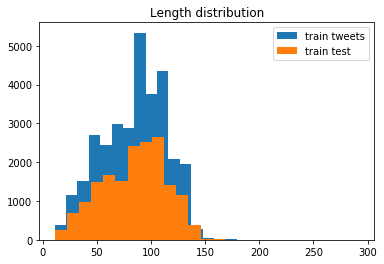

In [6]:
length_train=train['tweet'].str.len()
length_test=test['tweet'].str.len()
plt.hist(length_train,bins=25,label='train tweets')
plt.hist(length_test,bins=25,label='train test')
plt.legend()
plt.title('Length distribution')
plt.show()

In [7]:
combi = train.append(test, ignore_index=True)

C:\Users\GURURAJAN\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [8]:
combi.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation


In [9]:
stopwords = nltk.corpus.stopwords.words('english')

from nltk.stem import WordNetLemmatizer 

In [10]:
ps = WordNetLemmatizer()

In [11]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [12]:
combi['tidy_tweet']=np.vectorize(remove_pattern)(combi['tweet'],'@[\w]*')

In [13]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [14]:
combi['tidy_tweet']=combi['tidy_tweet'].str.replace("[^a-zA-Z#]",' ')

In [15]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [16]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [17]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional and selfish drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit can use cause they don offer wheelchair vans pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with all the time
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [18]:
def tokenize(text):
    tokens=re.split('\W+',text)
    return tokens
tokenized_tweet =combi['tidy_tweet'].apply(lambda x: tokenize(x.lower()))

In [19]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.lemmatize(i) for i in x])

In [20]:
tokenized_tweet

0                                                                   [when, father, dysfunctional, and, selfish, drag, his, kid, into, his, dysfunction, run]
1                                              [thanks, for, lyft, credit, can, use, cause, they, don, offer, wheelchair, van, pdx, disapointed, getthanked]
2                                                                                                                                    [bihday, your, majesty]
3                                                                                                                [, model, love, take, with, all, the, time]
4                                                                                                                     [factsguide, society, now, motivation]
5                                [huge, fan, fare, and, big, talking, before, they, leave, chaos, and, pay, dispute, when, they, get, there, allshowandnogo]
6                                                         

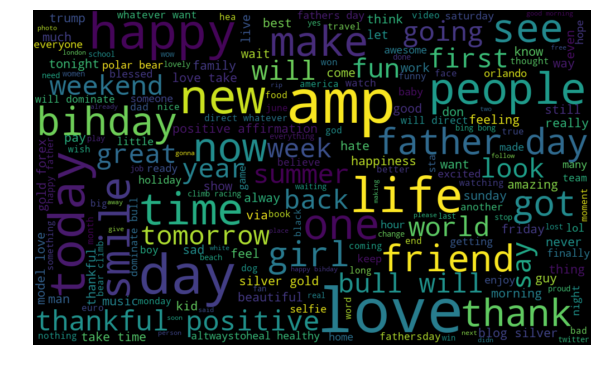

In [21]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in combi['tidy_tweet']])  
wordcloud = WordCloud(width=1000, height=600, random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()



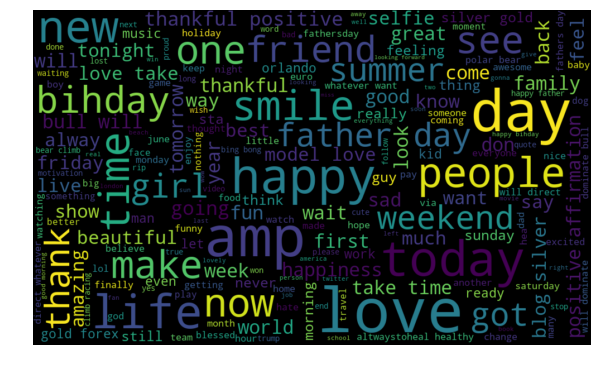

In [22]:
from wordcloud import WordCloud
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==0]])  
wordcloud = WordCloud(width=1000, height=600, random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

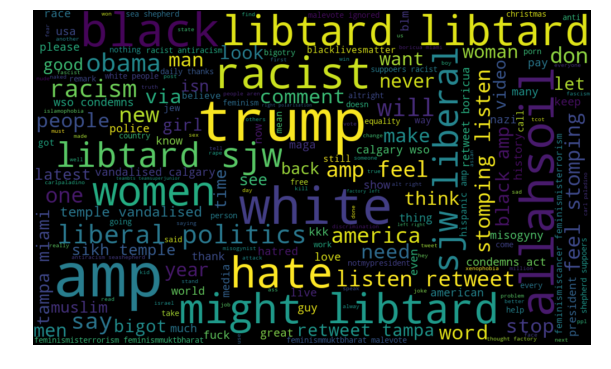

In [23]:
from wordcloud import WordCloud
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])  
wordcloud = WordCloud(width=1000, height=600, random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [25]:
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [26]:
bow.shape
(49159, 1000)

(49159, 1000)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [28]:

tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])


In [29]:
tfidf.shape


(49159, 1000)

In [30]:
import multiprocessing

from gensim.models import Word2Vec

In [31]:
from gensim.models import word2vec
print(word2vec.FAST_VERSION)

1


Word2Vec Embeddings

In [32]:
model_w2v = Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 4, # no.of cores
            seed = 34) 

In [33]:
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(8046834, 9808440)

In [34]:
model_w2v.wv.most_similar(positive="obama")

[('michelle', 0.5641913414001465),
 ('christmaseve', 0.5569627285003662),
 ('jab', 0.552371084690094),
 ('barrack', 0.5372927188873291),
 ('jackal', 0.5329123735427856),
 ('barackobama', 0.5314238667488098),
 ('jibe', 0.5301273465156555),
 ('globalists', 0.5280736088752747),
 ('remark', 0.5248987078666687),
 ('paladino', 0.5228332281112671)]

In [35]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
    if count != 0:
        vec /= count
    return vec

In [36]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays) 
wordvec_df.shape

(49159, 200)

Doc2Vec Embedding

In [37]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

In [38]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [39]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [40]:
labeled_tweets[:10]

[LabeledSentence(words=['when', 'father', 'dysfunctional', 'and', 'selfish', 'drag', 'his', 'kid', 'into', 'his', 'dysfunction', 'run'], tags=['tweet_0']),
 LabeledSentence(words=['thanks', 'for', 'lyft', 'credit', 'can', 'use', 'cause', 'they', 'don', 'offer', 'wheelchair', 'van', 'pdx', 'disapointed', 'getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['', 'model', 'love', 'take', 'with', 'all', 'the', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide', 'society', 'now', 'motivation'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave', 'chaos', 'and', 'pay', 'dispute', 'when', 'they', 'get', 'there', 'allshowandnogo'], tags=['tweet_5']),
 LabeledSentence(words=['camping', 'tomorrow', 'danny'], tags=['tweet_6']),
 LabeledSentence(words=['the', 'next', 'school', 'year', 'the', 'year', 'for', 'exam', 'can', 'think', 'about', 'tha

Training Doc2vec

In [41]:
from gensim.models.doc2vec import Doc2Vec

In [42]:
model_d2v =Doc2Vec(dm=1,dm_mean=1,size=200,window=5,negative=7,min_count=2,workers=4,alpha=0.1,seed = 23)

C:\Users\GURURAJAN\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:580: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [43]:
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

100%|███████████████████████████████████████████████████████████████████████| 49159/49159 [00:00<00:00, 3286542.08it/s]


In [44]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

In [45]:
docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 200)

# Building Logistic regression 

In [46]:
# Extracting train and test BoW features 
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 

In [47]:
# splitting data into training and validation set

In [48]:
from sklearn.model_selection import train_test_split
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],random_state=42,test_size=0.3)

In [49]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression() 

In [50]:
# training the model 
lreg.fit(xtrain_bow, ytrain)

C:\Users\GURURAJAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set

In [52]:
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 

In [53]:
prediction_int = prediction_int.astype(np.int)

In [54]:
from sklearn.metrics import f1_score
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5225531914893616

TF-IDF Features

In [55]:
train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 


In [56]:
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5239786856127886

Word2Vec Features

In [57]:
train_w2v = wordvec_df.iloc[:31962,:] 
test_w2v = wordvec_df.iloc[31962:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.6154981549815499

Doc2Vec Features

In [58]:
train_d2v = docvec_df.iloc[:31962,:] 
test_d2v = docvec_df.iloc[31962:,:] 
xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]
lreg.fit(xtrain_d2v, ytrain) 
prediction = lreg.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

C:\Users\GURURAJAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.37976782752902155

# Building RandomForest

Bag-of-Words Features

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, random_state=11,n_jobs=-1).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
f1_score(yvalid, prediction)#validation score

0.48198558847077666

TF-IDF Features

In [60]:
rf = RandomForestClassifier(n_estimators=400, random_state=11,n_jobs=-1).fit(xtrain_tfidf, ytrain)

In [61]:
prediction = rf.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.516431924882629

Word2Vec Features

In [62]:
rf = RandomForestClassifier(n_estimators=400, random_state=11,n_jobs=-1).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.4946236559139785

Doc2Vec Features

In [63]:
rf = RandomForestClassifier(n_estimators=400, random_state=11,n_jobs=-1).fit(xtrain_d2v, ytrain) 
prediction = rf.predict(xvalid_d2v) 
f1_score(yvalid, prediction)

0.0202020202020202

# Building XG Boost 

In [64]:
import xgboost as xgb

In [65]:
from xgboost.sklearn import XGBClassifier

In [66]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 
f1_score(yvalid, prediction)

0.49360865290068834

TF-IDF Features

In [67]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.504381694255112

Word2Vec Features

In [68]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.6423357664233575

The highest prediction score

Doc2Vec Features

In [69]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain) 
prediction = xgb.predict(xvalid_d2v) 
f1_score(yvalid, prediction)

0.3333333333333333

# Building LightGBM

In [70]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [71]:
lgbm = LGBMClassifier(objective='binary', random_state=0)

In [72]:
lgbm.fit(xtrain_w2v, ytrain)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [73]:
prediction = lgbm.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.6

# Hyperparameter tunning

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [76]:
# Create the parameter grid 
params = {
             'max_depth': [1,2,3,4,5,6,7,8,9,10],
             'n_estimators': [100,150,200]
          
          }

n_folds = 5

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lgbm, param_grid = params, 
                          cv = n_folds, verbose = 1,n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(xtrain_w2v,ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31,
                                      objective='binary', random_state=0,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3,

In [77]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
29,21.294395,2.478276,0.143716,0.020734,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.960894,0.959330,0.963128,0.960215,0.959097,0.960533,0.001448,1
17,21.767835,0.173062,0.190625,0.002430,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.962011,0.959106,0.960447,0.958203,0.959321,0.959818,0.001309,2
23,25.600143,0.247273,0.199127,0.004777,8,200,"{'max_depth': 8, 'n_estimators': 200}",0.960447,0.956201,0.963575,0.959544,0.957756,0.959505,0.002507,3
22,19.234653,0.134722,0.165419,0.007917,8,150,"{'max_depth': 8, 'n_estimators': 150}",0.960447,0.956201,0.962235,0.960215,0.958426,0.959505,0.002046,3
28,20.453537,0.479316,0.159062,0.010504,10,150,"{'max_depth': 10, 'n_estimators': 150}",0.958436,0.958212,0.962905,0.959544,0.957532,0.959326,0.001903,5


In [78]:
lgbm = LGBMClassifier(objective='binary', random_state=0,n_estimators=200,max_depth=10)

In [79]:
# Create the parameter grid 
params = {
'num_leaves':range(28,45,1),
    
          
          }

n_folds = 5

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lgbm, param_grid = params, 
                          cv = n_folds, verbose = 1,n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(xtrain_w2v,ytrain)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:  5.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=10,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=200,
                                      n_jobs=-1, num_leaves=31,
                                      objective='binary', random_state=0,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=-1, param_grid={'num_leaves': range(28, 45)},
     

In [80]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,29.934977,0.170547,0.203621,0.005563,35,{'num_leaves': 35},0.960670,0.958436,0.963352,0.960662,0.959768,0.960577,0.001610,1
13,33.957610,0.271601,0.207624,0.003726,41,{'num_leaves': 41},0.962682,0.959330,0.962458,0.960215,0.958203,0.960577,0.001749,1
3,27.179270,0.135618,0.204453,0.006555,31,{'num_leaves': 31},0.960894,0.959330,0.963128,0.960215,0.959097,0.960533,0.001448,3
14,33.925364,0.451355,0.204280,0.005497,42,{'num_leaves': 42},0.961788,0.960000,0.962905,0.960438,0.957532,0.960533,0.001816,3
2,26.338254,0.157351,0.207047,0.008238,30,{'num_leaves': 30},0.961117,0.958659,0.961341,0.960885,0.959768,0.960354,0.001005,5


In [81]:
lgbm = LGBMClassifier(objective='binary', random_state=0,n_estimators=200,max_depth=10,num_leaves=35)

In [82]:
# Create the parameter grid 
params = {
'reg_alpha':range(5,30,5),
 'reg_lambda':range(1,7,1)   
    
          
          }

n_folds = 5

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lgbm, param_grid = params, 
                          cv = n_folds, verbose = 1,n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(xtrain_w2v,ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=10,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=200,
                                      n_jobs=-1, num_leaves=35,
                                      objective='binary', random_state=0,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'reg_alpha': range(5, 

In [83]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_alpha,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,22.598599,0.105720,0.215491,0.008219,5,3,"{'reg_alpha': 5, 'reg_lambda': 3}",0.961117,0.955978,0.962458,0.959991,0.958203,0.959549,0.002267,1
4,23.231138,0.220539,0.224715,0.020352,5,5,"{'reg_alpha': 5, 'reg_lambda': 5}",0.962011,0.956872,0.961788,0.959097,0.957532,0.959460,0.002120,2
1,22.089398,0.280106,0.215862,0.008320,5,2,"{'reg_alpha': 5, 'reg_lambda': 2}",0.960447,0.958659,0.960670,0.958873,0.958650,0.959460,0.000903,2
6,15.658816,0.537113,0.179128,0.007942,10,1,"{'reg_alpha': 10, 'reg_lambda': 1}",0.959330,0.955978,0.962682,0.959991,0.957756,0.959147,0.002246,4
5,23.521016,0.190835,0.213563,0.012392,5,6,"{'reg_alpha': 5, 'reg_lambda': 6}",0.960894,0.956425,0.961341,0.959097,0.957085,0.958968,0.001968,5


# Best model LightGBM

In [84]:
lgbm = LGBMClassifier(objective='binary', random_state=0,n_estimators=200,max_depth=10,num_leaves=35,reg_alpha=5,reg_lambda=3)

In [85]:
lgbm.fit(xtrain_w2v, ytrain)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=35, objective='binary',
               random_state=0, reg_alpha=5, reg_lambda=3, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [86]:
prediction = lgbm.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.6260089686098654